In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import random
from sklearn import preprocessing

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import astropy
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl

In [2]:
#searchlight_data=pd.read_csv('s128/Searchlight_accuracies_sig.csv')
subjects=['s105','s107','s108','s109','s110','s112','s113','s114','s115','s116','s117','s118','s119','s120','s121','s122','s123','s126','s128']
## Initializing the matrix with the first subject s103
searchlight_data=np.loadtxt('subjects_data/Functional_data/s103/Significant_searchlight_acc_s103.csv',delimiter=',')
print(searchlight_data.shape)
for sub in subjects:
    file_name='subjects_data/Functional_data/'+sub+'/Significant_searchlight_acc_'+sub+'.csv'
    #print(file_name)
    searchlight_data_temp=np.loadtxt(file_name,delimiter=',')
    print(searchlight_data.shape)
    searchlight_data=np.concatenate((searchlight_data,searchlight_data_temp),axis=1)
searchlight_data.shape

(15544, 160)
(15544, 160)
(15544, 320)
(15544, 480)
(15544, 640)
(15544, 800)
(15544, 960)
(15544, 1120)
(15544, 1280)
(15544, 1440)
(15544, 1600)
(15544, 1760)
(15544, 1920)
(15544, 2080)
(15544, 2240)
(15544, 2400)
(15544, 2560)
(15544, 2720)
(15544, 2880)
(15544, 3040)


(15544, 3200)

In [4]:
print(searchlight_data[1:10,1:10])
print(searchlight_data.shape)

[[0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 1. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 1. 0. 1. 1.]]
(15544, 3200)


In [5]:
## Standardizing the data
searchlight_data_stan=preprocessing.StandardScaler().fit_transform(searchlight_data)

In [6]:
# print(means[1:10])
print(searchlight_data[0:10,0:10])
print(searchlight_data_stan[0:10,0:10])

[[0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 1.]]
[[-0.62795766  1.34605604 -0.73044083 -0.43119738 -0.64312125 -0.49961799
   2.21489843 -0.56595864 -0.63373739  1.75737718]
 [-0.62795766 -0.74291112  1.36903629 -0.43119738 -0.64312125 -0.49961799
  -0.45148797  1.76691357  1.57794066 -0.56902981]
 [ 1.59246405 -0.74291112 -0.73044083 -0.43119738 -0.64312125 -0.49961799
  -0.45148797  1.76691357 -0.63373739 -0.56902981]
 [ 1.59246405 -0.74291112  1.36903629 -0.43119738 -0.64312125 -0.49961799
  -0.45148797  1.76691357 -0.63373739 -0.56902981]
 [ 1.59246405 -0.74291112  1.36903629 -0.43119738 -0.64312125 -0.49961799
  -0.45148797  1.76691357  1.57794066 -0.56902981]
 [ 1.59246405 -0.74291112  1.36903629 -0.431

In [7]:
print(np.mean(searchlight_data_stan[:,130]))
print(np.std(searchlight_data_stan[:,130]))

5.119710911292539e-17
0.9999999999999217


15


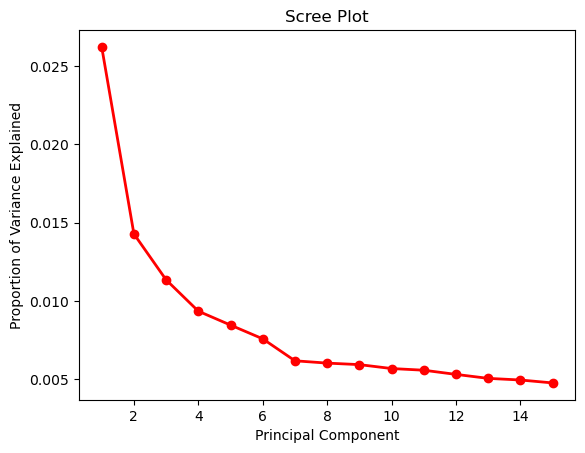

In [10]:
## Running PCA to get num of components
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
sl_pca=pca.fit_transform(searchlight_data_stan)

## Getting the scree plot for the pca
PC_values = np.arange(pca.n_components_) + 1
print(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
# plt.savefig("ScreePlot15Comps.png")
plt.show()


In [15]:
print(len(pca.components_))
print(sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

15
0.12671809948537835
[0.0262344  0.01428516 0.01135086 0.00934782 0.00845818 0.00757997
 0.00617632 0.00602827 0.00593124 0.0056813  0.00557385 0.005307
 0.00505313 0.00494875 0.00476184]
[83.95547086 45.71546666 36.32510041 29.91493575 27.06793325 24.25746097
 19.7655034  19.29170703 18.98118734 18.18131843 17.83748174 16.9834822
 16.1710712  15.83702883 15.23885906]


In [17]:
from sklearn.decomposition import FastICA
#number_components=pca.n_components_
number_components=7 ## Hard coding the number of components
# Compute ICA
ica = FastICA(n_components=number_components, whiten="arbitrary-variance",random_state=42)
C = ica.fit_transform(searchlight_data_stan)  # Reconstruct signals
#C = ica.fit_transform(sl_pca)  # Reconstruct signals
M = ica.mixing_  # Get estimated mixing matrix trs x comps

/home/mes628/anaconda/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [18]:
print(C.shape)
print(M.shape)
Mt=np.transpose(M)

(15544, 7)
(3200, 7)


In [19]:
print(M)

[[ -9.913441    -4.1815369  -13.25957536 ...  -6.80689738  -6.4521377
   -8.97694631]
 [ 13.07691944 -10.93092505  -9.64584791 ...  -6.54764745  -2.29206433
   -5.27345658]
 [-24.74060904   2.60768713   5.23497671 ...   6.65999747  13.13413551
   -4.09907935]
 ...
 [  5.33745095  -3.86804015   9.70222655 ...  -4.24623837  -6.18228984
  -15.44670531]
 [-31.73538216 -11.83888342  29.74674287 ...   7.01497404  -5.85466321
   -5.9796451 ]
 [-29.35481708  -5.12828206  30.21936905 ...  -1.5554389   -6.84038576
    4.64189789]]


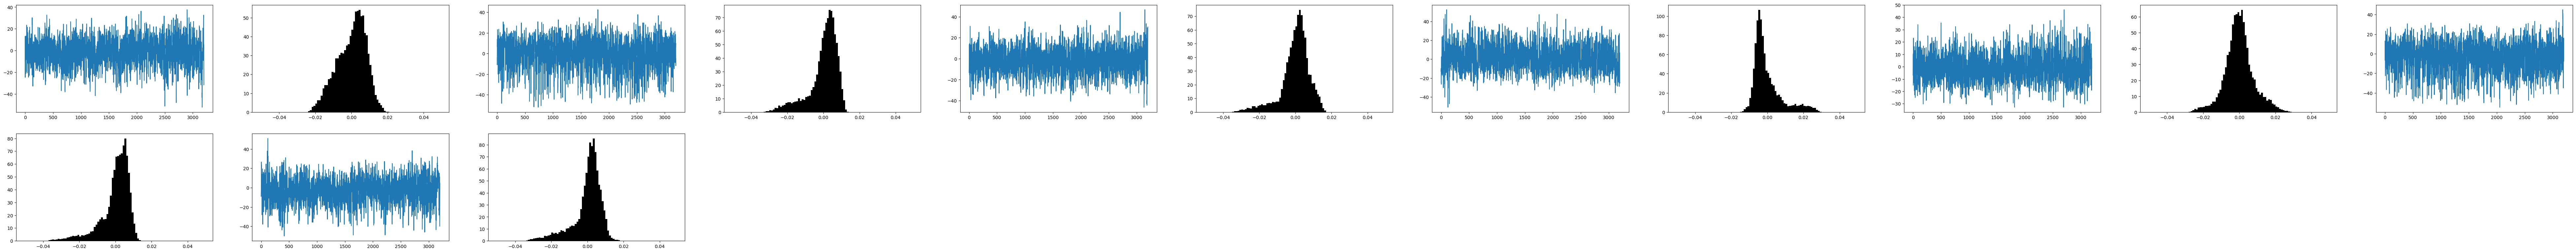

In [20]:
fig = plt.figure(figsize=(100, 60))

for j in range(0,number_components):
    #print(j)
    weight=M[:,j]
    comp=C[:,j]
    comp=comp.reshape(-1,1)
    ax=fig.add_subplot(12,11,2*j+1)
    plt.plot(weight) ## Plotting the weight along with the frequency distribution
    ax=fig.add_subplot(12,11,2*j+2)
    plt.hist(comp, density=True, color='black',bins=np.arange(-0.05,0.05,0.001))
plt.savefig("frequency_distribution_7c.png")

In [33]:
## Gaussian Mixture model: Not using this anymore
# gmm = GMM(n_components = 4, max_iter=1000, random_state=10, covariance_type = 'full')

## Calculating mean and std of each component and taking all the voxels which lie above it. 
compMeans=np.mean(C,axis=0)
compStd=np.std(C,axis=0)*2 ## 2 standard deviation away from the mean
compVoxels=np.zeros(C.shape)
print(compMeans,compStd)
print(np.std(C[:,0]),np.std(C[:,1]),np.std(C[:,2]))
total_count=0
for c in range(0,number_components):
    for v in range(C.shape[0]):
        if abs(C[v,c])>=compStd[c]:
            compVoxels[v,c]=C[v,c]
    #compVoxels[:,c]=compVoxels[:,c].astype(int)
    # print(sum(compVoxels))
    print(len(np.nonzero(compVoxels[:,c])[0]))
    total_count+=len(np.nonzero(compVoxels[:,c])[0])
print("Total number of searchlights: ",total_count)

[-3.02840043e-17 -1.59990966e-17  7.31387273e-18 -5.25684602e-18
 -6.74247642e-18  5.48540455e-18  1.79418440e-17] [0.01604163 0.01604163 0.01604163 0.01604163 0.01604163 0.01604163
 0.01604163]
0.008020816971440395 0.008020816971440413 0.008020816971440421
614
1016
881
1125
1067
858
978
Total number of searchlights:  6539


In [35]:
# for c in range(0,number_components):
#     print(compVoxels[np.nonzero(compVoxels[:,c])[0],c])
#     print(sum(compVoxels[:,c]))

In [37]:
# print(voxels_eachComp)
# print(min(voxels_eachComp), max(voxels_eachComp))
print(C.shape[0])

15544


In [39]:
# ## Getting the components out
sig_compMap=np.zeros(C.shape)
for c in range(0,number_components):
    #sig_compMap[compVoxels[:,c]==1,c]=C[compVoxels[:,c]==1,c]
    for v in range(C.shape[0]):
        if compVoxels[v,c]!=0:
            # sig_compMap[v,c]=C[v,c]
            sig_compMap[v,c]=1*(c+1)
# sig_compMap_cc=np.sum(sig_compMap,axis=1)

In [41]:
## Getting the concatenated map of the components - if they have overlap
sig_compMap_cc1=np.zeros(C.shape[0])
sig_compMap_cc2=np.zeros(C.shape[0])
count1=0
count2=0
count3=0
count4=0
count5=0
for v in range(sig_compMap.shape[0]):
    if len(np.nonzero(sig_compMap[v,:])[0])==0:
        continue
    if len(np.nonzero(sig_compMap[v,:])[0])==1:
        sig_compMap_cc1[v]=sum(sig_compMap[v,:])
        sig_compMap_cc2[v]=sum(sig_compMap[v,:])
        count1+=1
    elif len(np.nonzero(sig_compMap[v,:])[0])==2:
        sig_compMap_cc1[v]=14
        ind1=np.nonzero(sig_compMap[v,:])[0][0]
        ind2=np.nonzero(sig_compMap[v,:])[0][1]
        sig_compMap_cc2[v]= sig_compMap[v,ind1] ** 2 + sig_compMap[v,ind2] ** 2
        count2+=1
    elif len(np.nonzero(sig_compMap[v,:])[0])==3:
        sig_compMap_cc1[v]=21
        ind1=np.nonzero(sig_compMap[v,:])[0][0]
        ind2=np.nonzero(sig_compMap[v,:])[0][1]
        ind3=np.nonzero(sig_compMap[v,:])[0][2]
        sig_compMap_cc2[v]= sig_compMap[v,ind1] ** 2 + sig_compMap[v,ind2] ** 2 + sig_compMap[v,ind3] ** 2
        count3+=1
    elif len(np.nonzero(sig_compMap[v,:])[0])==4:
        sig_compMap_cc1[v]=28
        ind1=np.nonzero(sig_compMap[v,:])[0][0]
        ind2=np.nonzero(sig_compMap[v,:])[0][1]
        ind3=np.nonzero(sig_compMap[v,:])[0][2]
        ind4=np.nonzero(sig_compMap[v,:])[0][3]
        sig_compMap_cc2[v]= sig_compMap[v,ind1] ** 2 + sig_compMap[v,ind2] ** 2 + sig_compMap[v,ind3] ** 2 +sig_compMap[v,ind4] ** 2
        count4+=1
    else:
        sig_compMap_cc1[v]=50
        sig_compMap_cc2[v]=50
        print("There are more than 5 components who overlap each other\n")
        count5+=1
        

In [41]:
# print(count1,count2,count3, count4, count5)
# print(sig_compMap_cc1[563],sig_compMap_cc2[563])

In [43]:
# # a=sig_compMap[1,:]
# # print(a)
# # len(np.nonzero(a)[0])
# # 5993+270+2+9279
# # # np.nonzero(sig_compMap[563,:])[0][0]

# ## Values reference table - for 2 intersecting components
# print("Values for two intersecting components/n")
# for i in range(1,8):
#     for j in range(i,8):
#         if i!=j:
#             print(i,j,i**2+j**2)

# ## Values reference table - for 2 intersecting components
# print("Values for three intersecting components/n")
# for i in range(1,8):
#     for j in range(i,8):
#         for k in range(j,8):
#             if i!=j and i!=k:
#                 print(i,j,k,i**2+j**2+k**2)


In [46]:
np.savetxt('Components_map_voxelValues_7c_2std.csv',compVoxels,delimiter=',')

In [47]:
np.savetxt('Components_map_7c_2std.csv',sig_compMap,delimiter=',')
np.savetxt('Components_map_concatenated1_7c_2std.csv',sig_compMap_cc1,delimiter=',')
np.savetxt('Components_map_concatenated2_7c_2std.csv',sig_compMap_cc2,delimiter=',')
# np.savetxt('Weights_components_7c_2std.csv',M,delimiter=',')